# Nine Examples to Master Seaborn Grids
## Practical guide for FacetGrid and PairGrid

Data visualization is a fundamental piece of data analysis. It helps us better understand the relationships in the data and explore the underlying structure.

We can create more informative visualizations by combining multiple plots in the same figure. There are many ways to create multi-plot visualizations. Seaborn library makes it simple and straightforward to generate such plots using the FacetGrid and PairGrid classes.
In this article, we will go over 9 examples to practice how to use these function. We will start with very basic ones and steadily increase the complexity. For the examples, we will be using a customer churn dataset available on Kaggle.

We start with importing the necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')

Backing off send_request(...) for 0.5s (requests.exceptions.ConnectionError: HTTPSConnectionPool(host='api.segment.io', port=443): Max retries exceeded with url: /v1/batch (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x13bc7b8b0>: Failed to establish a new connection: [Errno 61] Connection refused')))
Backing off send_request(...) for 1.6s (requests.exceptions.ConnectionError: HTTPSConnectionPool(host='api.segment.io', port=443): Max retries exceeded with url: /v1/batch (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x13d269f70>: Failed to establish a new connection: [Errno 61] Connection refused')))


The next step is to read the dataset into a Pandas dataframe. 

### NOTE: dataset can be found from various sources on GitHub.

Select some of the columns in the original dataset, filter and sample for demonstration purposes.

In [2]:
cols = [
        'Attrition_Flag','Gender','Education_Level',
        'Marital_Status','Customer_Age','Credit_Limit',
        'Total_Trans_Amt','Avg_Open_To_Buy'
       ]
churn = pd.read_csv(
    "./Contents/BankChurners.csv", usecols=cols
    ).sample(n=1000)
churn = churn[churn.Marital_Status.isin(['Married','Single'])]
churn = churn[churn.Education_Level.isin(['Graduate','High School', 'Unknown'])]
churn.head()

,Attrition_Flag,Customer_Age,Gender,Education_Level,Marital_Status,Credit_Limit,Avg_Open_To_Buy,Total_Trans_Amt
1547,Existing Customer,54,F,Unknown,Married,3796.0,1400.0,2069
1563,Existing Customer,38,M,Graduate,Married,3242.0,1166.0,1841
8465,Existing Customer,45,F,Graduate,Married,1438.3,604.3,4976
6833,Existing Customer,52,F,Graduate,Single,8961.0,7579.0,4408
4684,Existing Customer,35,F,Graduate,Single,1438.3,1438.3,3427


***
## Example 1
We first create a FacetGrid object and then map the data. Let’s start with a very simple example of creating the structure of a FacetGrid.

FacetGrid is a grid of subplots which allows for transferring the structure of the dataset to the subplots. Row, col, and hue parameters can be considered as the three dimensions of FacetGrid objects.

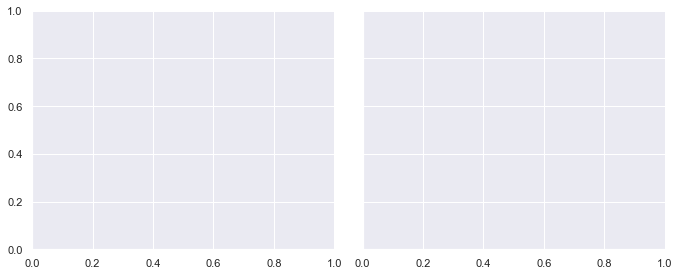

In [3]:
g = sns.FacetGrid(churn, col='Attrition_Flag', height=4, aspect=1.2)

We now have an empty plot that only represents the structure.
Seaborn generates the structure based on the values in the columns passed to the col and row parameters. Since the Attrition_Flag column has two unique values, a grid with two columns is returned. The height and aspect parameters adjust the size of subplots.

***
## Example 2
Once we have a FacetGrid object, we can map data to it.

### NOTE: histplot requires seaborn 0.11+ which can be installed via conda install -c anaconda seaborn

In [4]:
g.map(sns.histplot, 'Customer_Age')

The map method takes a plotting function and variables to plot as argument. The grid above shows the distribution of the customer age column using a histogram. The data points are separated according to the categories in attrition flag column.

***
## Example 3
The plotting function passed to the map method does not have to be a Seaborn function. We can also use matplotlib functions. For instance, the plot above can be created with “plt.hist”.

Note: Seaborn also accepts custom functions to use for mapping. However, there are certain rules you must follow when creating them.

***
## Example 4
We have only used the col parameter so far. We can use the row and hue parameters to add more dimensions.

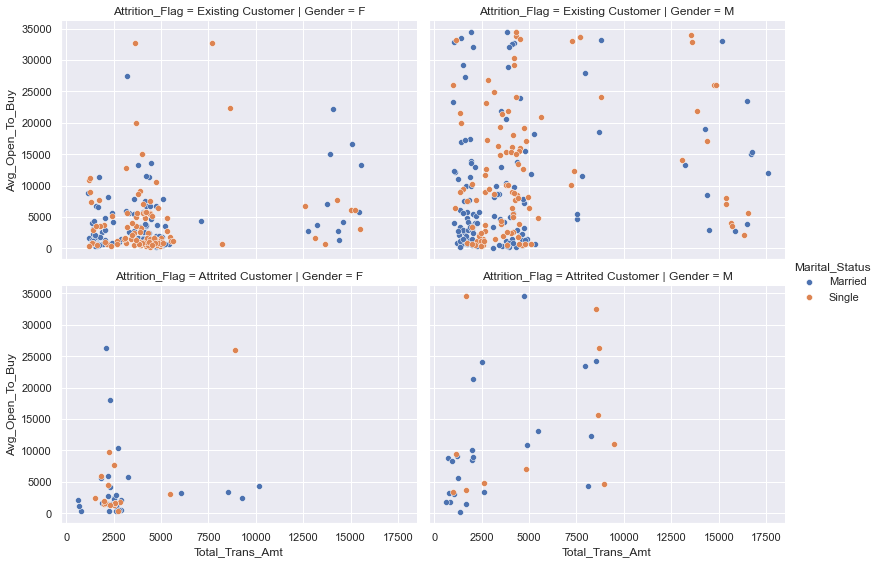

In [5]:
g = sns.FacetGrid(
   churn, row='Attrition_Flag', col='Gender', hue='Marital_Status', 
   height=4, aspect=1.4
)
g.map(sns.scatterplot, 'Total_Trans_Amt', 'Avg_Open_To_Buy')
g.add_legend()

We have a grid of scatter plots that show the relationship between two numerical columns. We are able to demonstrate relationship separately for categories in the attrition flag, gender, and marital status columns.
When we use the hue parameter, the legend should also be added using the add_legend function.

***
## Example 5
We can specify the order of the categories represented by the subplots. The row_order and col_order parameters can be used to order.

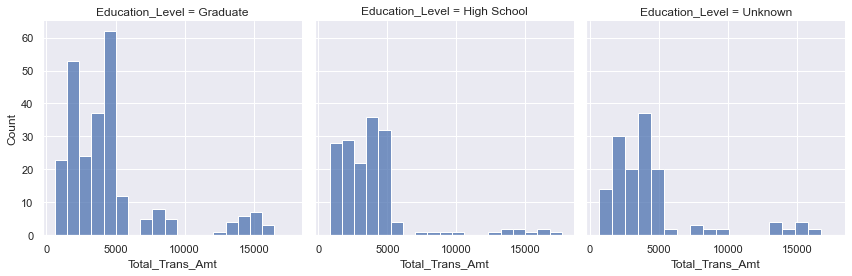

In [6]:
col_order = churn.Education_Level.value_counts().index
g = sns.FacetGrid(
   churn, col='Education_Level', height=4,
   col_order = col_order
)
g.map(sns.histplot, 'Total_Trans_Amt')

As you can also notice from the plots, the categories are sorted by size. We have used the value_counts function of Pandas to generate an order for the categories.

***
## Example 6
PairGrid generates a grid of plots that visualize the pairwise relationships of variables. For instance, we can create a grid of scatter plots between some numerical variables.

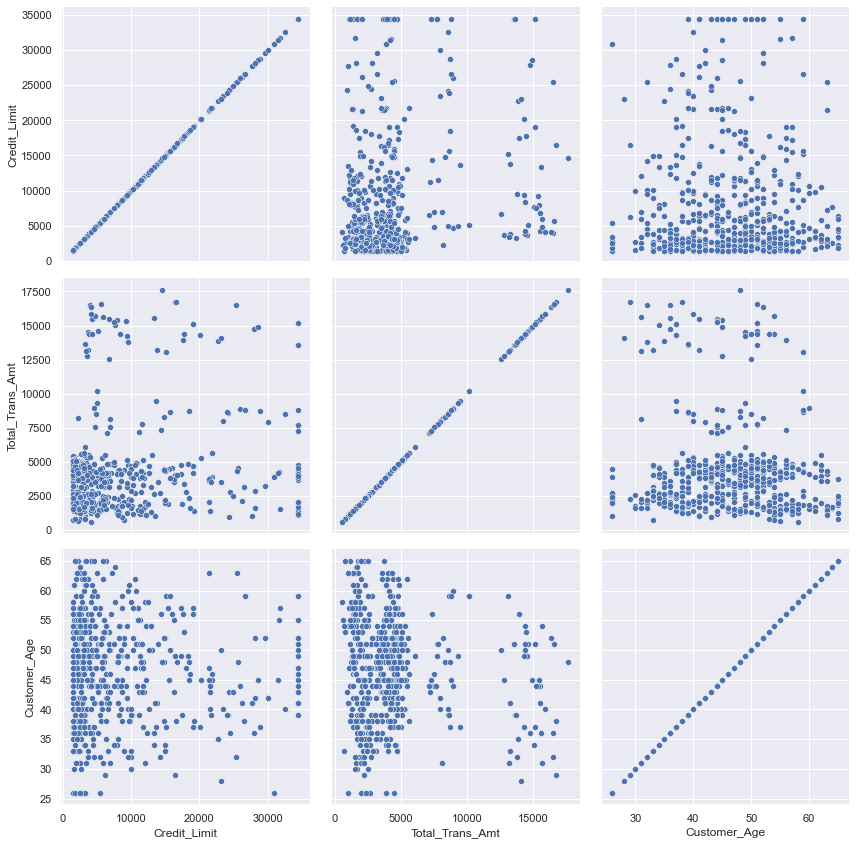

In [7]:
cols = ['Credit_Limit','Total_Trans_Amt','Customer_Age']
g = sns.PairGrid(churn[cols], height=4)
g.map(sns.scatterplot)

***
## Example 7
In the previous example, the plots on the diagonal are useless because they show a scatter plot of a variable with itself. In order to make the grid more informative, we can plot histograms of variables on the diagonal.
We pass separate functions by using the map_diag and map_offdiag methods.

Backing off send_request(...) for 3.6s (requests.exceptions.ConnectionError: HTTPSConnectionPool(host='api.segment.io', port=443): Max retries exceeded with url: /v1/batch (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x13dfa3d90>: Failed to establish a new connection: [Errno 61] Connection refused')))


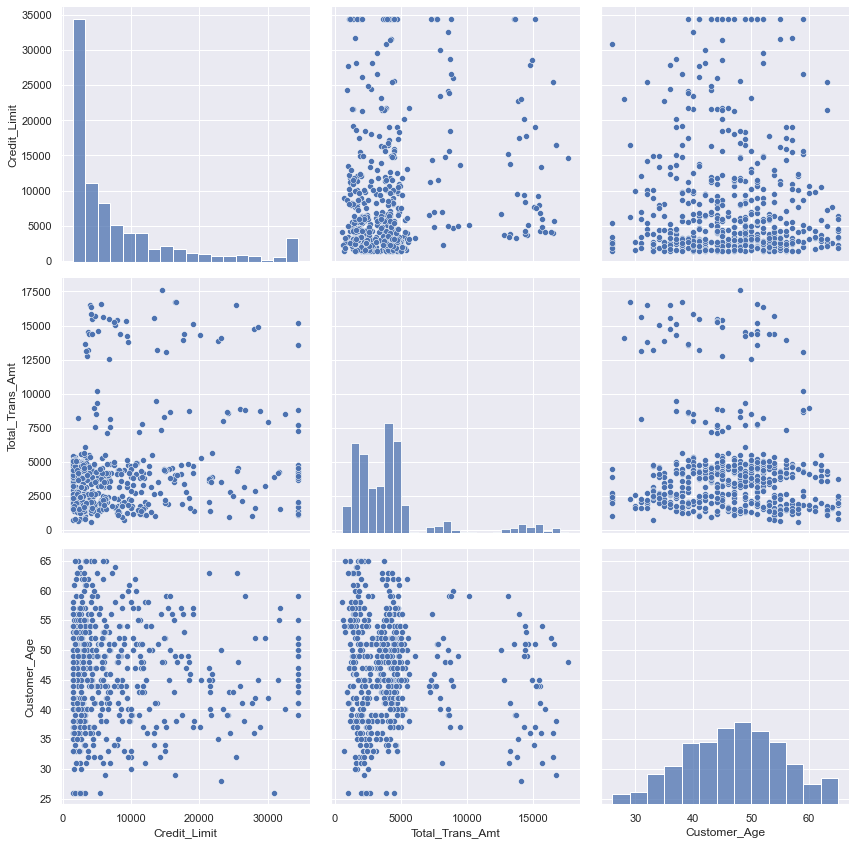

In [8]:
g = sns.PairGrid(churn[cols], height=4)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

It is better than the previous one as we also get an overview of the distribution of each variable.

***
## Example 8
The PairGrid also supports the hue parameter so we can separate the data points in the scatter plot based on a categorical variable.
Another useful parameter is the var parameter. In the previous examples for PairGrid, we used a subset of the dataframe so it only included the columns to be plotted. We can also pass a list of columns to be plotted to the var parameter.

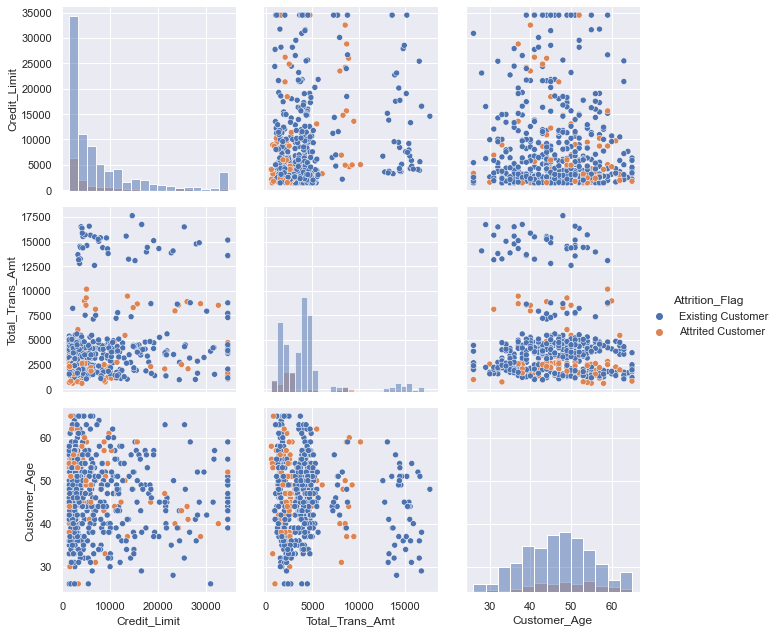

In [9]:
g = sns.PairGrid(churn, vars=cols, hue='Attrition_Flag', height=3)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

***
## Example 9
In a PairGrid, the plots on the upper and lower side of diagonal are mirror images. Thus, we have the same plot from a different perspective.
We have the option to have different kind of plots on the upper and lower side of the diagonal. The map_upper and map_lower functions are used to generate different kinds of plots for the upper and lower side.

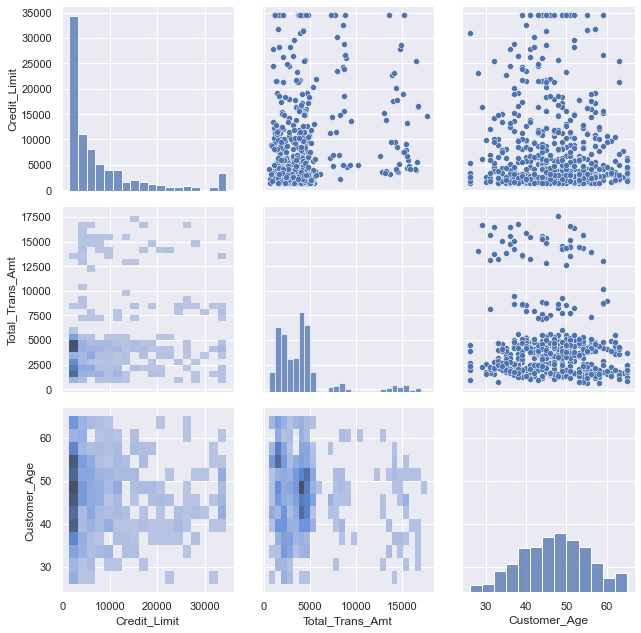

Backing off send_request(...) for 6.3s (requests.exceptions.ConnectionError: HTTPSConnectionPool(host='api.segment.io', port=443): Max retries exceeded with url: /v1/batch (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x13f6a4e20>: Failed to establish a new connection: [Errno 61] Connection refused')))
Backing off send_request(...) for 8.7s (requests.exceptions.ConnectionError: HTTPSConnectionPool(host='api.segment.io', port=443): Max retries exceeded with url: /v1/batch (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x13f714220>: Failed to establish a new connection: [Errno 61] Connection refused')))
Backing off send_request(...) for 12.6s (requests.exceptions.ConnectionError: HTTPSConnectionPool(host='api.segment.io', port=443): Max retries exceeded with url: /v1/batch (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x16817a9a0>: Failed to establish a new connection: [Errno 61] Connection refuse

In [10]:
g = sns.PairGrid(churn, vars=cols, height=3)
g.map_diag(sns.histplot)
g.map_upper(sns.scatterplot)
g.map_lower(sns.histplot)

On the upper side, we have the scatter plots. The diagonal contains the histograms of each variable. On the lower side, we have two-dimensional histograms.

***
## Conclusion
We have practiced how to create multi-plot visualizations with the FacetGrid and PairGrid of Seaborn. They are very useful tools for exploratory data analysis. The way Seaborn generates these plots makes them simple and easy to understand.
It is important to understand the differences between a FacetGrid and PairGrid. In a FacetGrid, each subplot represents the same relationship but under different conditions. For instance, we can have a scatter plot of two variables in a FacetGrid and separate the data points based on the categories of another variables.
In the PairGrid, each plot shows a different relationship. For instance, when we create a PairGrid of scatter plots with three variables, each subplot represents a different pairwise relationship.
There are many more features that can be added on FacetGrid and PairGrid objects in order to enrich both the functionality and appearance. Once you are comfortable with the basic ones, you can create more detailed grids.